<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>Applied Lesson - Iris & Breast Cancer Datasets</b></h1>
  </div>
</div>

<br>

## Load libraries
---

We'll need the following libraries for today's lecture:
1. `pandas`
2. `numpy`
3. `matplotlib` and `seaborn`
4. `KNeighborsClassifier` from `sklearn`'s `neighbors` module
6. `train_test_split` from `sklearn`'s `model_selection` module
7. `StandardScaler` from `sklearn`'s `preprocessing` module
8. `ConfusionMatrixDisplay` from `sklearn`'s `metrics` module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# **PART 1:** The Iris Dataset
---

> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. - [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [ ]:
iris = pd.read_csv('/gdrive/MyDrive/Coding Temple/8 - Machine Learning Classification/Coding-Temple-M8-Applied-Iris-Breast-Cancer/data/iris.csv')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


## Data Cleaning
---

Let's see if our `DataFrame` requires any cleaning. In the cells below:
1. Check the `dtypes` to make sure every column is numerical
2. Check for null values

In [ ]:
iris.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [ ]:
iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


## EDA: Visualizing KNN
---

Using `seaborn`, create a scatter plot using two features from your `DataFrame`: `'petal length (cm)'` and `'petal width (cm)'`. Each dot should be colored according to its species.

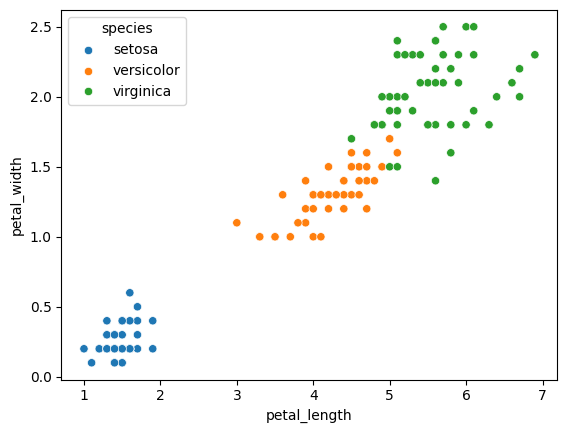

In [ ]:
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species');

## EDA: Pairplot
---

Let's expand on the scatter plot created in the previous step. We can use `seaborn`'s `.pairplot()` method to create scatter plots using all of our features.

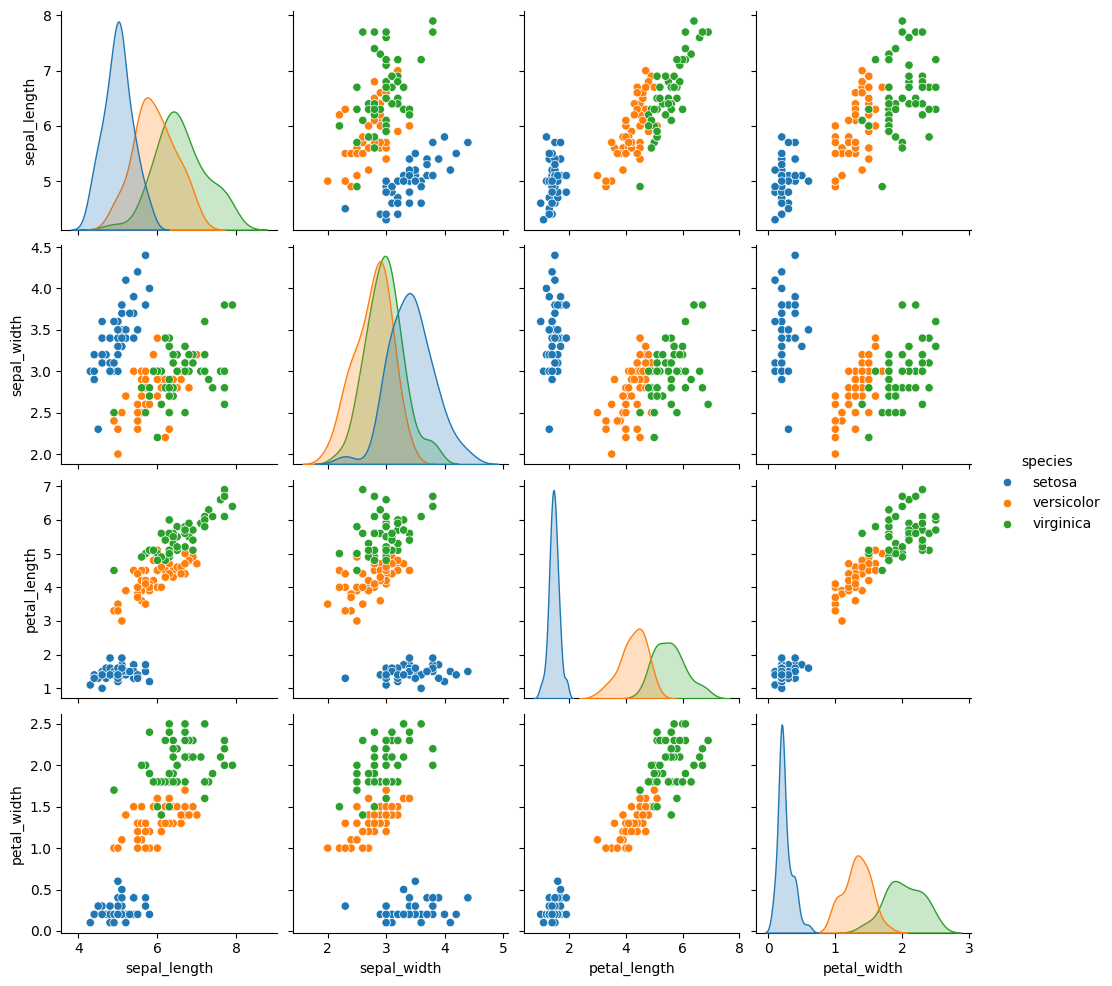

In [ ]:
sns.pairplot(data = iris, hue = 'species');

## EDA: Quick Aside - Plotly

Seaborn isn't the only data visualization library! Plotly is a versatile data visualization library that empowers users to create interactive and dynamic plots and charts. It is becoming more widely used, offering a user-friendly interface for generating visually appealing and interactive graphics for data analysis and presentation. Want to learn more about Plotly? Visit the documentation [here](https://plotly.com/python/)!

In [ ]:
import plotly.express as px

In [ ]:
px.scatter_3d(data_frame = iris, x = 'sepal_length', y = 'sepal_width', z = 'petal_width', color = 'species')

## Baseline Model - what our model needs to beat!

In [ ]:
iris['species'].value_counts(normalize = True)

,proportion
species,
setosa,0.333333
versicolor,0.333333
virginica,0.333333


> We want a model that will have a better accuracy score than 33.33%!

## Train/Test split
---

Use the `train_test_split` function to split your data into a training set and a holdout set.

In [ ]:
X = iris.drop(columns = 'species')
y = iris['species']

In [ ]:
# stratify=y ensures a somewhat similar ratio of classes between train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

## `StandardScaler`
---
StandardScaler is a preprocessing technique in machine learning that standardizes the features of a dataset by transforming them to have a mean of 0 and a standard deviation of 1. StandardScaler is particularly useful when working with algorithms (like KNN!) that are sensitive to the scale of the input features, ensuring that all features contribute equally to the model's learning process and preventing any single feature from dominating due to its larger magnitude.

Because KNN is calculating the distance between neighbors, it's highly sensitive to the magnitude of your features. For example, if we were using KNN on a housing dataset, a feature like square footage (measured in **thousands** of feet^2) can really affect the distance.

Thus, in order for KNN to work properly, it's important to scale our data. In the cells below, create an instance of `StandardScaler` and use it to transform `X_train` and `X_test`.

In [ ]:
sc = StandardScaler()

In [ ]:
# Fit and transform the training set
X_train_sc = sc.fit_transform(X_train)

In [ ]:
# Transform X_test
X_test_sc = sc.transform(X_test)

## Instantiate KNN
---

For the `KNeighborsClassifier`, there a few important parameters to keep in mind:

1. `n_neighbors`: this is the "K" in KNN. The best K will change from problem to problem, but the default is 5.
2. `weights`: The neighbors can all have an equal vote (`uniform`), or the closer points can have a higher weighted vote (`distance`).
3. `p`: The distance metric. The default is Euclidean distance (2). Changing it to 1 is setting the distance to Manhattan.

In the cell below, instantiate a `knn` model using the default parameters.

In [ ]:
knn = KNeighborsClassifier()

## Model Fitting and Evaluation
---

Now that we know what we can expect from our KNN model, let's
1. fit the model to `X_train_sc`, `y_train`
2. score it on `X_test_sc`, `y_test`

In [ ]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train_sc, y_train)

0.9821428571428571

In [ ]:
knn.score(X_test_sc, y_test)

0.9210526315789473

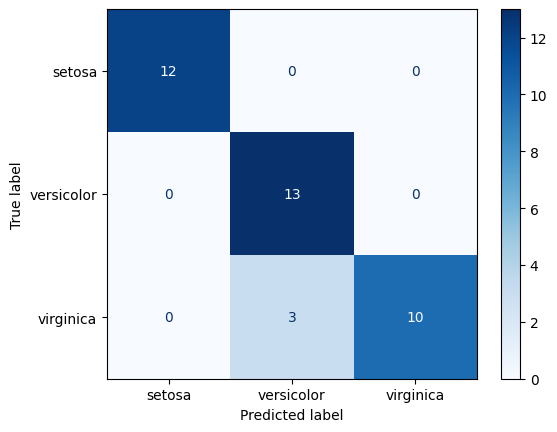

In [ ]:
# Generate a confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

We can vary the value of $k$ to determine if an improvement in model performance can be realized.  The video shows that increasing $k$ from 5 to 9 improves the model's accuracy.

# **PART 2:** Breast Cancer Dataset
We have another data set on breast cancer. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found [here](https://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/). You can find a partial data dictionary on Kaggle [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data).

In [114]:
bc = pd.read_csv('/gdrive/MyDrive/Coding Temple/8 - Machine Learning Classification/Coding-Temple-M8-Applied-Iris-Breast-Cancer/data/cancer.csv')

In [115]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [116]:
# Drop 'Unnamed: 32' and 'id' columns since we don't need them.
bc.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [117]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [118]:
bc.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


## EDA: Pairplot
---

Let's expand on the scatter plot created in the previous step. We can use `seaborn`'s `.pairplot()` method to create scatter plots using a few chosen features.

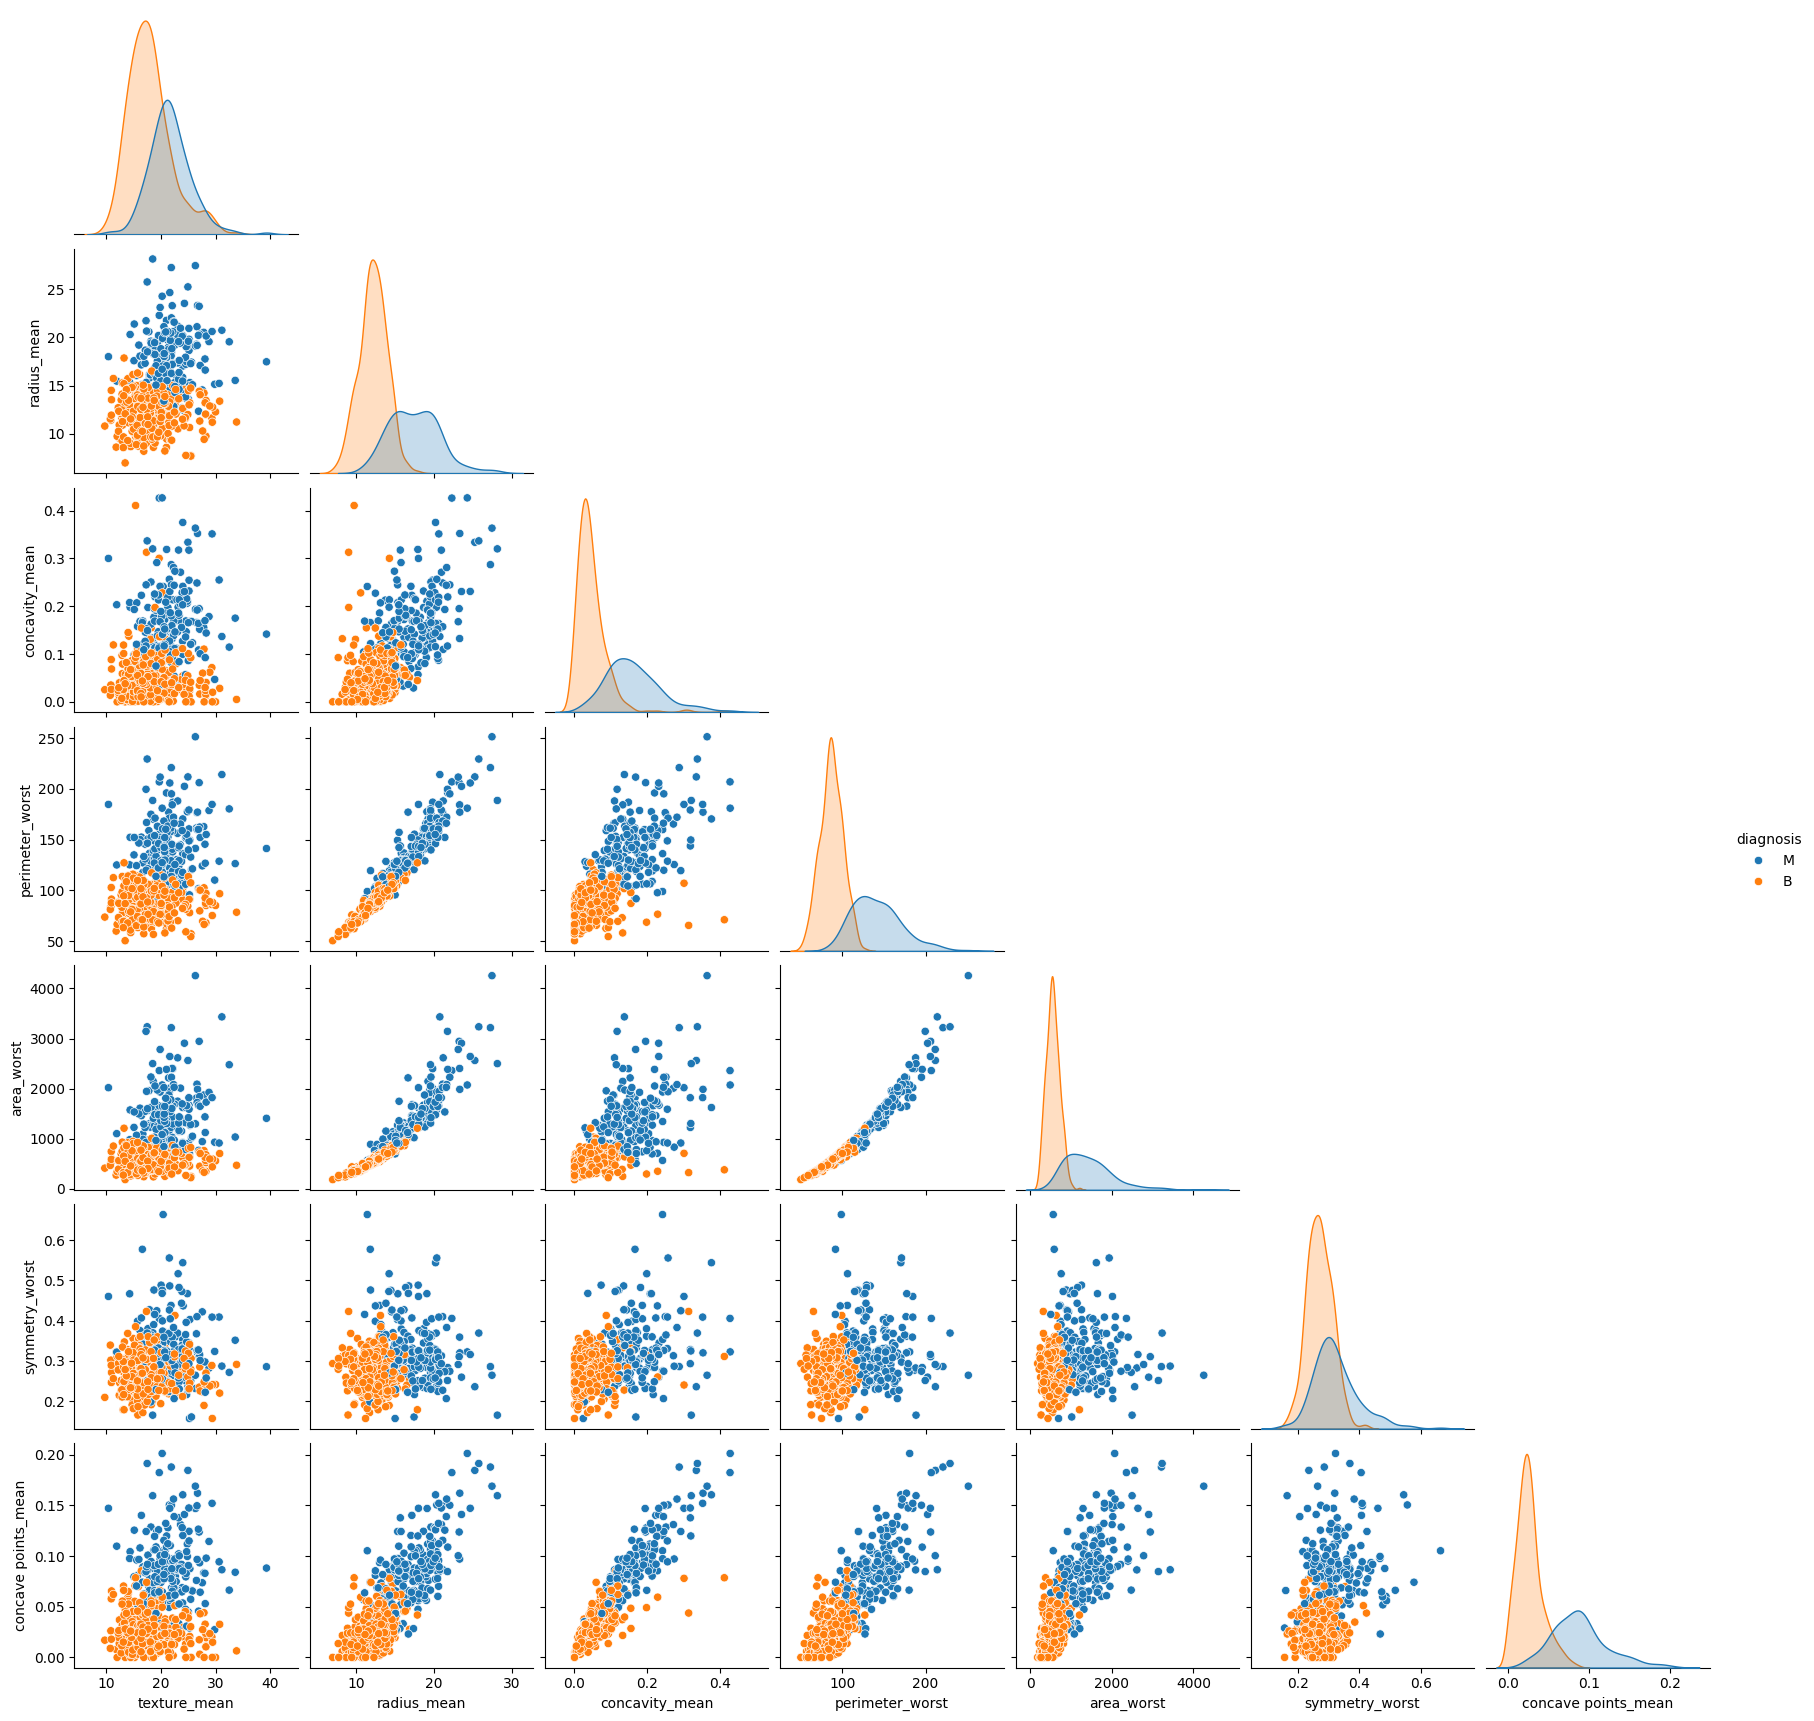

In [119]:
# A pairplot shows that there is good separation between the two diagnoses
sns.pairplot(data = bc,
             x_vars = ['texture_mean', 'radius_mean', 'concavity_mean', 'perimeter_worst', 'area_worst', 'symmetry_worst', 'concave points_mean'],
             y_vars = ['texture_mean', 'radius_mean', 'concavity_mean', 'perimeter_worst', 'area_worst', 'symmetry_worst', 'concave points_mean'],hue = 'diagnosis', corner=True);

## Heat Map of Diagnoses

In [120]:
# We need to convert diagnosis to a numerical quantity

bc['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [121]:
bc['diagnosis'] = bc['diagnosis'].map({'M':1,'B':0})
bc['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


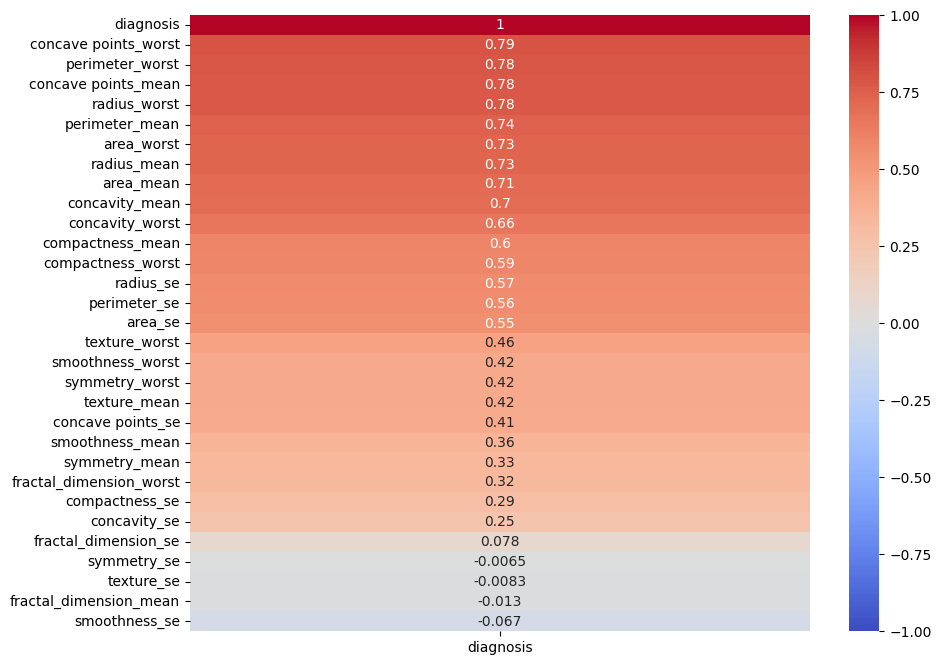

In [122]:
plt.figure(figsize = (10,8))
sns.heatmap(bc.corr(numeric_only=True)[['diagnosis']].sort_values(by='diagnosis', ascending = False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);

## Baseline Model

In [123]:
bc['diagnosis'].value_counts(normalize = True)

,proportion
diagnosis,
0,0.627417
1,0.372583


> We want to get a model that has a higher accuracy than 62.7%!

In [124]:
# Define X and y
X = bc.drop(columns = 'diagnosis')
y = bc['diagnosis']

## Train/Test split
---

Use the `train_test_split` function to split your data into a training set and a holdout set.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

### `StandardScaler`
---

In [128]:
# Fit and transform the training set
X_train_sc = sc.fit_transform(X_train)

In [129]:
# Transform X_test
X_test_sc = sc.transform(X_test)

## Instantiate KNN
---
Use the defaults for now! We'll play around with different values of `k` in a bit!

In [130]:
knn = KNeighborsClassifier()

## Model fitting and evaluation
---

Now that we know what we can expect from our KNN model, let's
1. fit the model to `X_train_sc`, `y_train`
2. score it on `X_test_sc`, `y_test`

In [131]:
# Fit
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [132]:
# Training accuracy score
knn.score(X_train_sc, y_train)

0.9765258215962441

In [133]:
# Testing accuracy score
knn.score(X_test_sc, y_test)

0.958041958041958

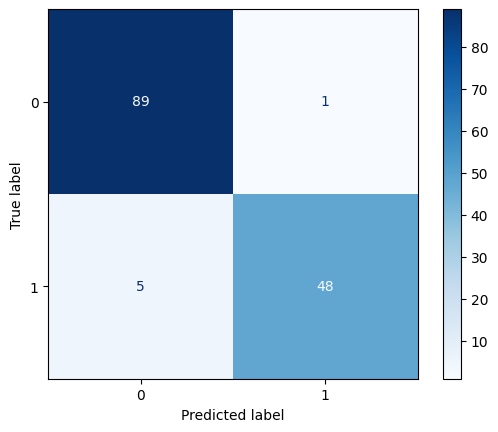

In [134]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

## The Model... or _A_ Model?
We let a default of $k$ = 5 earlier. Is that best? How do we know?

In [136]:
# Create empty list for scores
scores = []

for k in range(3, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})
df_scores = pd.DataFrame(scores)
df_scores

,k,train_score,test_score
0,3,0.983568,0.958042
1,5,0.976526,0.958042
2,7,0.969484,0.972028
3,9,0.974178,0.958042
4,11,0.964789,0.958042
5,13,0.964789,0.965035
6,15,0.962441,0.965035
7,17,0.960094,0.951049
8,19,0.960094,0.958042
9,21,0.960094,0.958042


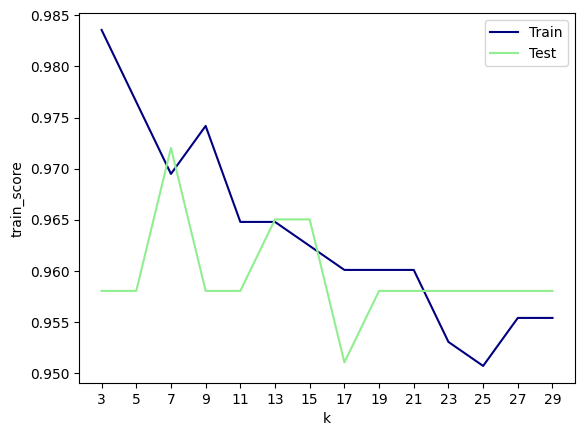

In [138]:
# Visualize this:
sns.lineplot(data = df_scores, x = 'k', y = 'train_score', c='navy', label='Train');
sns.lineplot(data = df_scores, x = 'k', y = 'test_score', c ='lightgreen', label='Test');
plt.xticks(np.arange(3, 31, 2));

In [139]:
# Instantiate (again) & Refit (again)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=7)

In [140]:
# New training score
knn.score(X_train_sc, y_train)

0.9694835680751174

In [141]:
# New testing score
knn.score(X_test_sc, y_test)

0.972027972027972

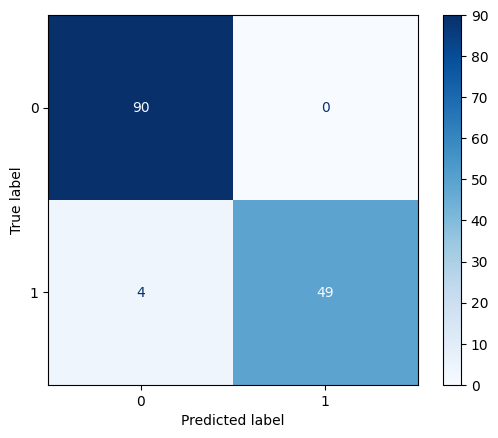

In [142]:
# New Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

In [ ]:
# A bit better!

# Conclusions and Takeaways
* k-nearest neighbors is a model that can be used for both regression and classification, but most commonly for classification
* It's a simpler model that doesn't always perform too well
* The "$k$" in kNN is what we'll come to know as a **tuning parameter** that can ge adjusted to get a better model
* kNN suffers from "the curse of dimensionality" - it gets more difficult to use and understand the more columns we have. kNN is best when our data aren't too "wide"

**When to use kNN**
* When you don't have too many rows
* When you don't have too many columns
* When you don't have any categorical features

### Other Common Classification Models:

1. [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

2. [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#decision-trees)

3. [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)

4. [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html#svm)

5. [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes)

6. [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)


Each model has its own strengths and weaknesses, and the choice depends on the characteristics of the data and the goals of the classification task. It's often beneficial to experiment with multiple models and assess their performance to determine the most suitable approach for a particular problem.


### Let's Try Logistic Regression!

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [145]:
logr.score(X_train_sc, y_train)

0.9882629107981221

In [146]:
logr.score(X_test_sc, y_test)

0.965034965034965

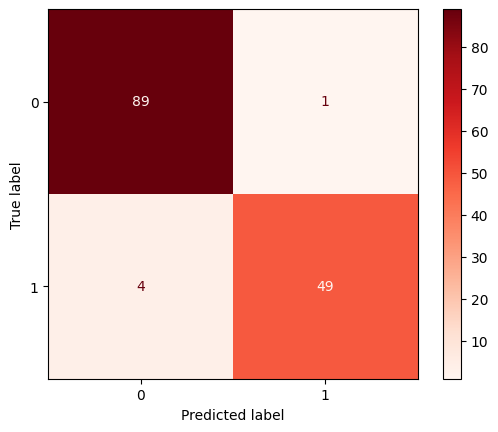

In [147]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

### Let's Try Random Forest!

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [150]:
rf.score(X_train_sc, y_train)

1.0

In [151]:
rf.score(X_test_sc, y_test)

0.965034965034965

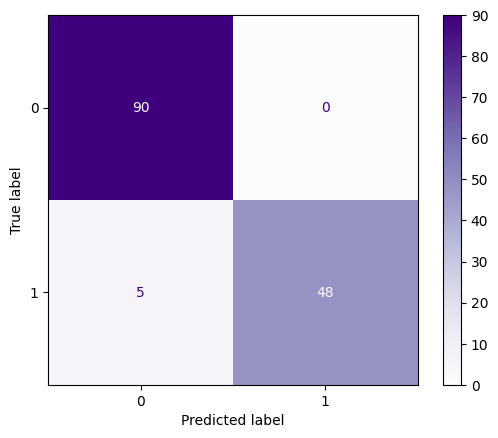

In [152]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');